속도모델에서 프로파일을 추출하여 깊이에 따라 속도 그림을 그려보겠습니다. 이진 형식의 속도파일에서 텍스트 파일로 프로파일을 추출한 후 그리는 방법과 이진 속도파일을 직접 읽어서 그리는 방법을 살펴보겠습니다. 참고로, 탄성파 공통송신원모음 등에서 트레이스를 추출하여 그리는 과정 또한 동일합니다.

### 텍스트 파일로 추출하여 그리기

바이너리 파일에서 프로파일 또는 트레이스를 추출하기 위해
[gpl]({% post_url 2014-07-26-geophysical-prospecting-library %}) 라이브러리의 `gplTracePick` 프로그램을 사용하겠습니다. 이차원 단면(속도모델, 공통송신원모음 등)에서 세로 방향 트레이스를 추출할 때 사용하는 프로그램입니다. (가로방향 트레이스는 `gplHTracePick` 프로그램을 이용하면 됩니다.) 이 프로그램을 그냥 실행하면 아래와 같은 도움말이 나옵니다.

In [6]:
%%sh # 이 글을 쓰고 있는 jupyter notebook에서 shell 명령을 실행하기 위한 magic command입니다.
gplTracePick # 실제 터미널상에서 실행하는 명령어

 Gpl trace picker
 Required parameters:
     [i] n1=            : # of grids in fast dimension
     [s] fin=           : input binary file
     [s] fout=          : output binary file
     [i] pick=          : (=first), first pick (1~n2)
 Optional parameters:
     [i] last=first     : last pick (pick~n2)
     [i] step=1         : pick step
     [f] d1=1.0         : grid size
     [i] n2=calc        : # of grids in slow dimension
     [s] type=f         : data type [ifdcz]
     [s] otype=a        : output type [ab] (ascii/binary)


위에서 `n1`, `fin`, `fout`, `pick`은 프로그램 실행시 필수적으로 넣어줘야 하는 값입니다.

- `n1`은 세로 방향(fast dimension) 격자수
- `fin`은 입력 파일 이름
- `fout`은 출력 파일 이름
- `pick`은 추출하고자하는 가로 방향(slow dimension) 격자 번호입니다. 격자 번호는 1번부터 시작합니다.

Marmousi 속도모델(nx=576, ny=188, h=0.016 km)에 대해 1.6 km 지점(격자번호 101)에서 시작하여 3.2 km 간격(200개 격자 간격)으로 3개의 속도 프로파일을 추출한다면 아래와 같이 실행할 수 있습니다.

In [18]:
%%sh
gplTracePick n1=188 d1=0.016 fin=marm16km.bin fout=vel_profile.txt pick=101 step=200 last=501

 n2=         576


     n1=188
     d1=0.016
     fin=marm16km.bin
     fout=vel_profile.txt
     pick=101
     step=200
     last=501


그 때 결과물은 아래와 같습니다. 첫 번째 열은 깊이 정보, 두 번째부터 네 번째 열까지는 추출한 속도 프로파일 정보입니다(1.6 km, 4.8 km, 8.0 km).

In [19]:
%%sh
head vel_profile.txt

   0.00000000       1.50000012       1.50000012       1.50000012    
   1.60000008E-02   1.50000012       1.50000012       1.50000012    
   3.20000015E-02   1.50000012       1.65800011       1.59800005    
   4.80000004E-02   1.66200006       1.66200006       1.60200012    
   6.40000030E-02   1.66600013       1.66600013       1.60600019    
   8.00000057E-02   1.67000008       1.73999715       1.69000006    
   9.60000008E-02   1.67400002       1.74399781       1.69400012    
  0.112000003       1.67800009       1.61800003       1.69800007    
  0.128000006       1.78200006       1.70200002       1.63200009    
  0.144000009       1.78600013       1.70600009       1.63600004    


텍스트 파일로 추출한 결과는
[gnuplot]({% post_url 2014-07-27-gnu-quick-plot-gnuqp %})과 같은 프로그램을 이용해 빠르게 확인해볼 수 있습니다. 여기서는 파이썬의 Matplotlib을 이용하여 위의 속도 프로파일을 그려보겠습니다.

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [21]:
trc=np.loadtxt("vel_profile.txt")
trc.shape

(188, 4)

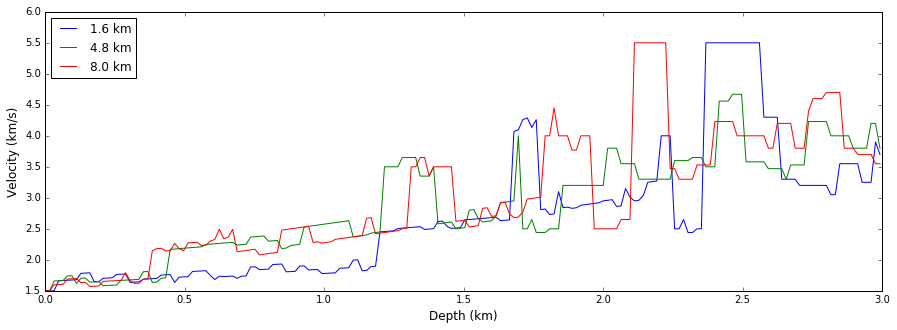

In [29]:
h=0.016
fs='large'

plt.figure(figsize=[15,5])
for i,ix in enumerate([100,300,500]):
    plt.plot(trc[:,0],trc[:,i+1],label="{0} km".format(ix*h))
    
plt.legend(loc="upper left",fontsize=fs)
plt.xlabel("Depth (km)",fontsize=fs)
plt.ylabel("Velocity (km/s)",fontsize=fs)

### 이진 파일을 직접 읽어서 그리기

이번에는 파이썬에서 이진 형식의 속도모델 파일을 직접 읽어서 그려보겠습니다.

In [30]:
nx=576
ny=188
vel=np.fromfile("marm16km.bin",dtype=np.float32)
vel.shape=(nx,ny)

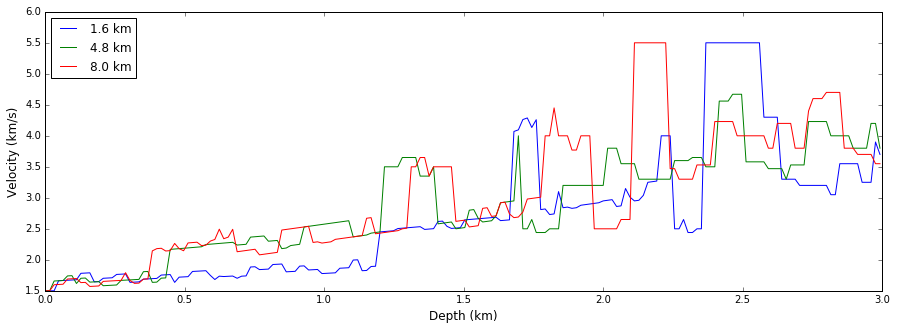

In [32]:
h=0.016
fs='large'
depth=np.arange(ny)*h

plt.figure(figsize=[15,5])
for ix in [100,300,500]:
    plt.plot(depth,vel[ix,:],label="{0} km".format(ix*h))
    
plt.legend(loc="upper left",fontsize=fs)
plt.xlabel("Depth (km)",fontsize=fs)
plt.ylabel("Velocity (km/s)",fontsize=fs)

참고로, 파이썬은 배열 인덱스가 0번부터 시작하기 때문에 가로방향 100, 300, 500번 속도 프로파일을 가져다가 그렸습니다(`gplTracePick`을 이용하는 앞의 예제에서는 101, 301, 501번 격자 위치에서 추출했죠).

### 탄성파 트레이스 그리기

공통송신원모음에서 탄성파 트레이스를 추출하여 그리는 과정은 속도모델에서 프로파일을 추출하여 그리는 경우와 동일합니다. 아래는 샘플 개수가 723개, 샘플링 간격 4 ms, 트레이스가 96개인 공통송신원모음 파일(marm3000.bin)에서 31번째와 61번째 트레이스를 그리는 예제입니다.

In [34]:
ntr=96
ns=723
dt=0.004
trc=np.fromfile("marm3000.bin",dtype=np.float32)
trc.shape=(ntr,ns)

(0, 2.892)

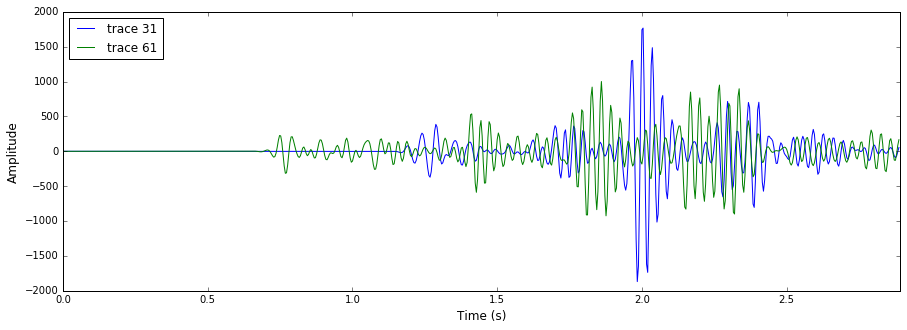

In [36]:
fs='large'
time=np.arange(ns)*dt

plt.figure(figsize=[15,5])
for itr in [30,60]:
    plt.plot(time,trc[itr,:],label="trace {0}".format(itr+1))
plt.legend(loc="upper left",fontsize=fs)
plt.xlabel("Time (s)",fontsize=fs)
plt.ylabel("Amplitude",fontsize=fs)
plt.xlim([0,ns*dt])